In [4]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


In [5]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


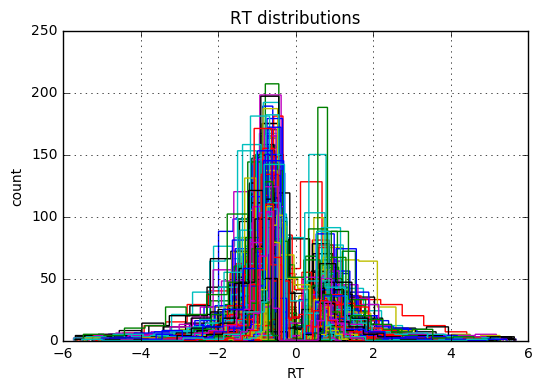

In [6]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [7]:
# subset dataset by emotion rating type (angry) and facial expression (disgust)
ad_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'disgusted')]
ad_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
277,lbmmswtrr0mpvov,5,2,angry,278,_faces/AF06_D_X.jpg,AF06_D_X,AF06,A,F,disgusted,baseline,0,-0.739635,0,100,0,0,0,0
279,lbmmswtrr0mpvov,5,2,angry,280,_faces/BF15_D_X.jpg,BF15_D_X,BF15,B,F,disgusted,baseline,0,-0.676370,0,100,0,0,0,0
294,lbmmswtrr0mpvov,5,2,angry,295,_faces/AF06_D_L.jpg,AF06_D_L,AF06,A,F,disgusted,lower,0,-2.581940,0,50,0,0,0,0
298,lbmmswtrr0mpvov,5,2,angry,299,_faces/HM08_D_L.jpg,HM08_D_L,HM08,H,M,disgusted,lower,0,-2.739345,0,50,0,0,0,0
301,lbmmswtrr0mpvov,5,2,angry,302,_faces/HM08_D_U.jpg,HM08_D_U,HM08,H,M,disgusted,upper,0,-0.667110,0,50,0,0,0,0
306,lbmmswtrr0mpvov,5,2,angry,307,_faces/BF15_D_L.jpg,BF15_D_L,BF15,B,F,disgusted,lower,0,-0.937380,0,50,0,0,0,0
311,lbmmswtrr0mpvov,5,2,angry,312,_faces/AF06_D_U.jpg,AF06_D_U,AF06,A,F,disgusted,upper,0,-0.693645,0,50,0,0,0,0
312,lbmmswtrr0mpvov,5,2,angry,313,_faces/HM08_D_X.jpg,HM08_D_X,HM08,H,M,disgusted,baseline,0,-0.660220,0,100,0,0,0,0
313,lbmmswtrr0mpvov,5,2,angry,314,_faces/BF15_D_U.jpg,BF15_D_U,BF15,B,F,disgusted,upper,0,-0.700915,0,50,0,0,0,0
439,mr81dhy9r5lxu8r,2,5,angry,117,_faces/HF04_D_L.jpg,HF04_D_L,HF04,H,F,disgusted,lower,1,1.763000,0,50,0,0,0,0


In [11]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ad_data = ad_data[(ad_data.subj_idx != 'dqph4ch0mkofejw')]

In [ ]:
# define model
m_ad = hddm.HDDMRegressor(ad_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 44431.2 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q         25q          50q        75q        97.5q       mc err
a                                    1.55122  0.0336354     1.48605     1.52789      1.55123     1.5737      1.61716  0.000906716
a_std                               0.429812  0.0315421    0.371314     0.40876      0.42819   0.449349     0.496324   0.00129036
a_subj.09coqg8hlpux6fe               1.36664   0.255603    0.953721     1.18232      1.33901    1.51492      1.95998    0.0064945
a_subj.0b3t2skj9mlhbkn               1.36069   0.213934     1.00517     1.20945      1.34215    1.48605        1.845   0.00448511
a_subj.0bcg7mtj2n1jjw9               2.29425   0.323368     1.73651     2.06446      2.26834    2.49394      3.00255    0.0070436
a_subj.0s53r30oouek89b               1.54264   0.269891     1.10877     1.34913       1.5141     1.6965      2.15407   0.00693798
a_subj.0uj9gbhag3o1w1v               1.63922   0.259688     1.21284     1.45275      1.612

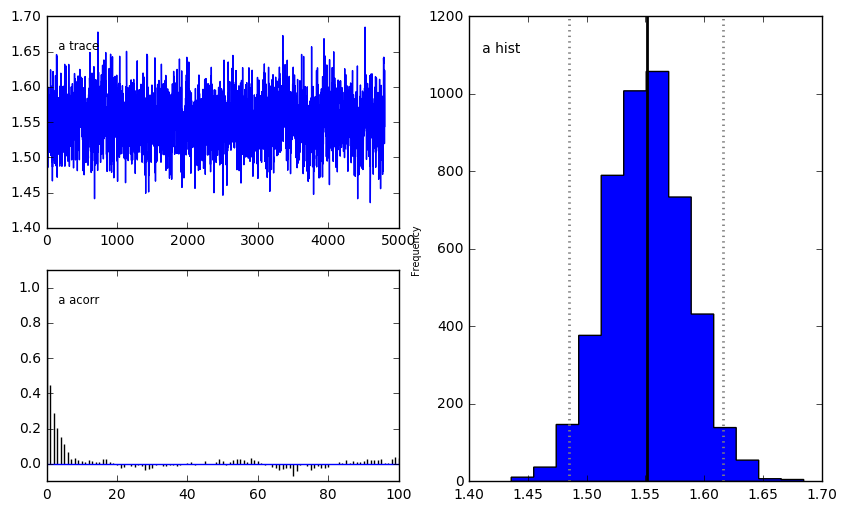

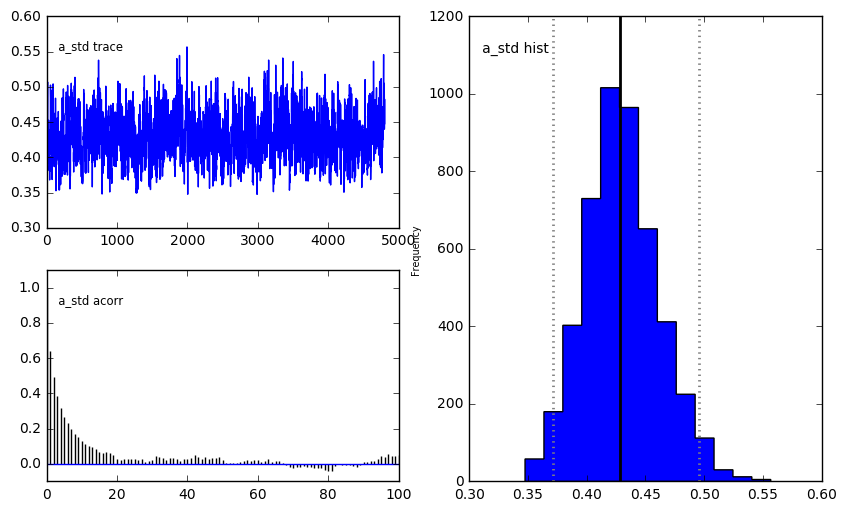

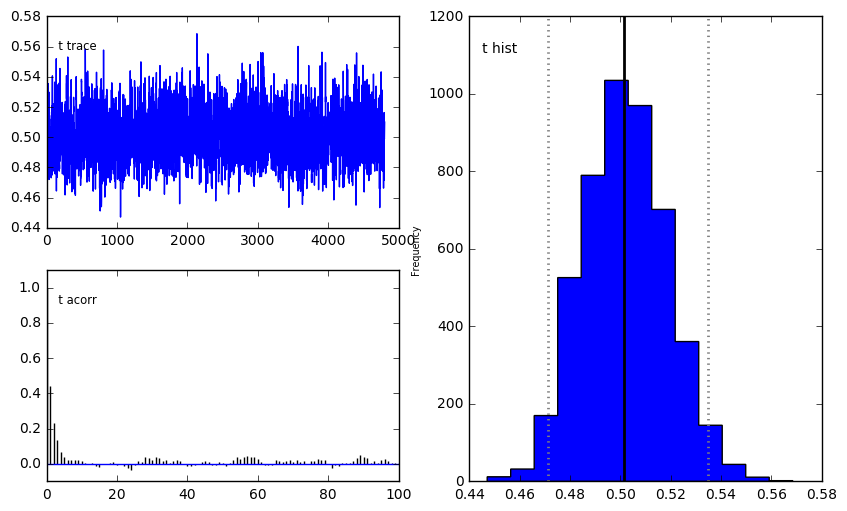

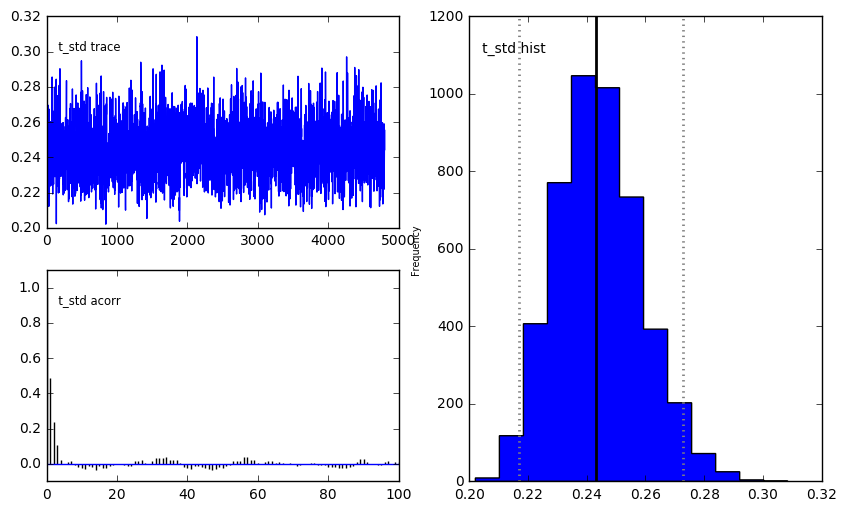

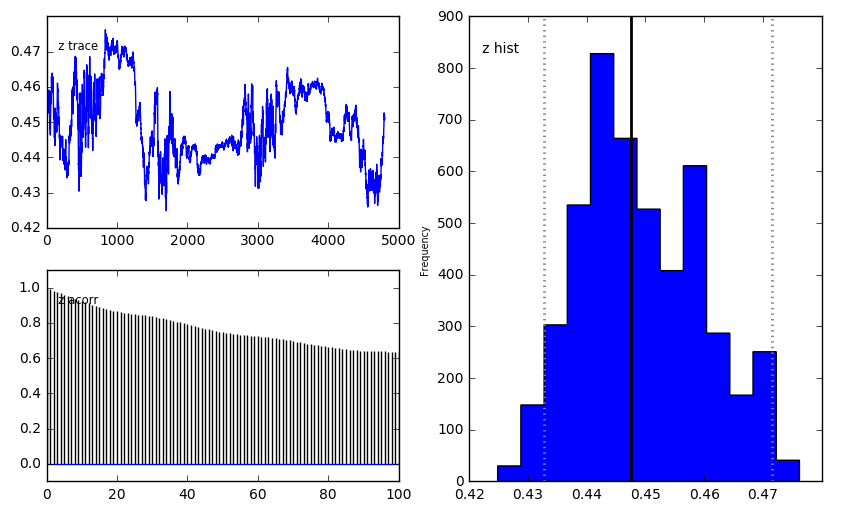

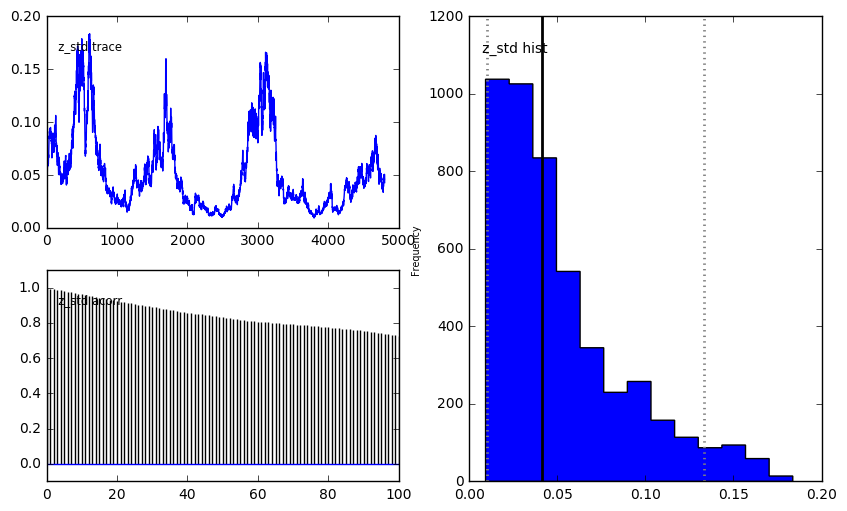

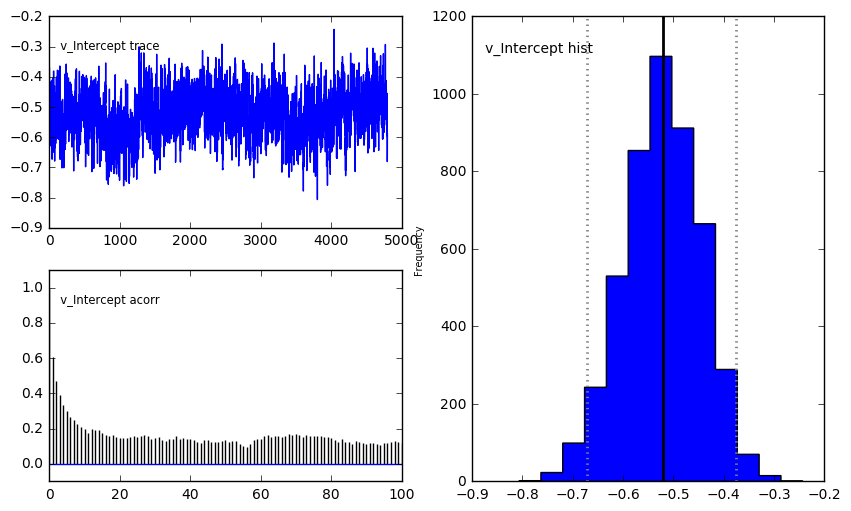

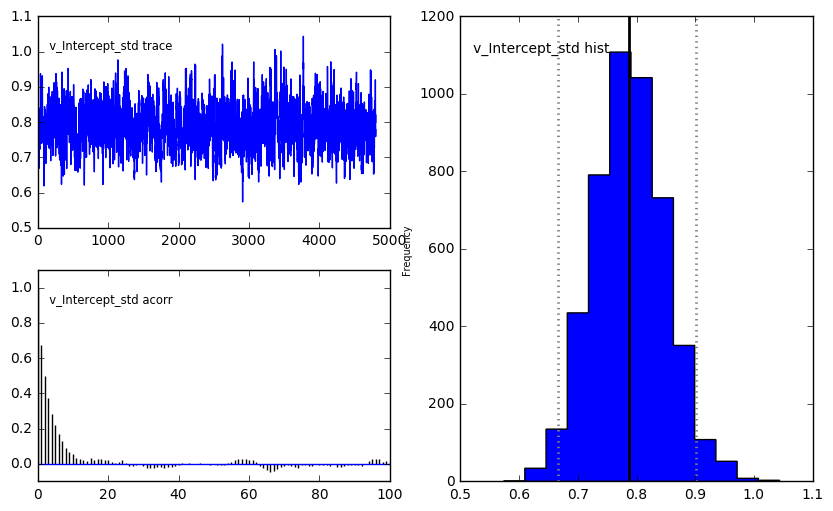

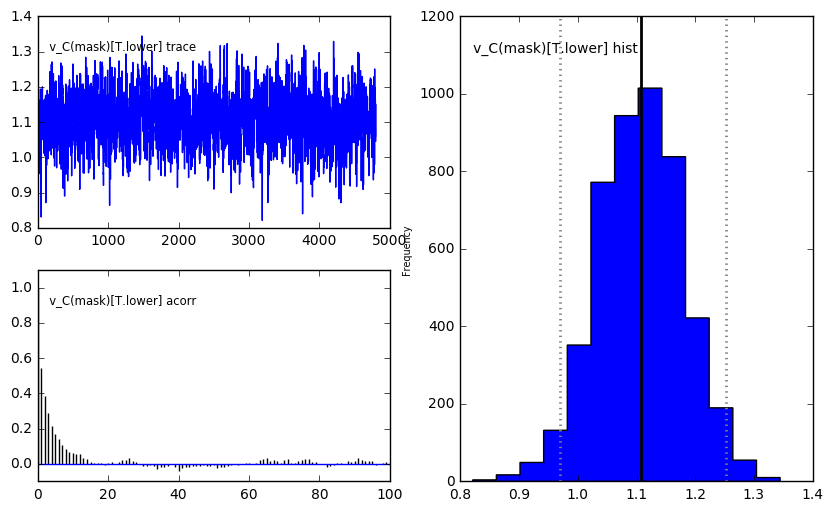

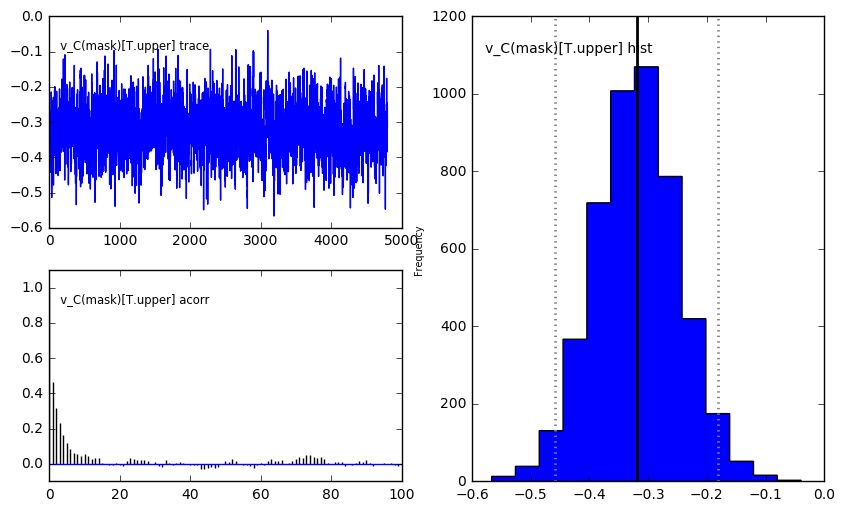

In [ ]:
# run model
m_ad.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ad.print_stats()
m_ad.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std      2.5q        25q  \
a                                    1.55122  0.0336354   1.48605    1.52789   
a_std                               0.429812  0.0315421  0.371314    0.40876   
a_subj.09coqg8hlpux6fe               1.36664   0.255603  0.953721    1.18232   
a_subj.0b3t2skj9mlhbkn               1.36069   0.213934   1.00517    1.20945   
a_subj.0bcg7mtj2n1jjw9               2.29425   0.323368   1.73651    2.06446   
a_subj.0s53r30oouek89b               1.54264   0.269891   1.10877    1.34913   
a_subj.0uj9gbhag3o1w1v               1.63922   0.259688   1.21284    1.45275   
a_subj.17nzn4k8r1qkmrn               1.25872   0.212429  0.909545    1.10498   
a_subj.1fdkw2qjx3hc3lk               1.60067   0.263948   1.15841    1.40893   
a_subj.1mla0dmotqefnav                1.8551   0.268664   1.40245     1.6675   
a_subj.23hr9tl84h3zhw3               1.73942   0.275938   1.27888    1.53768   
a_subj.27muqwvalwne26r               1.4

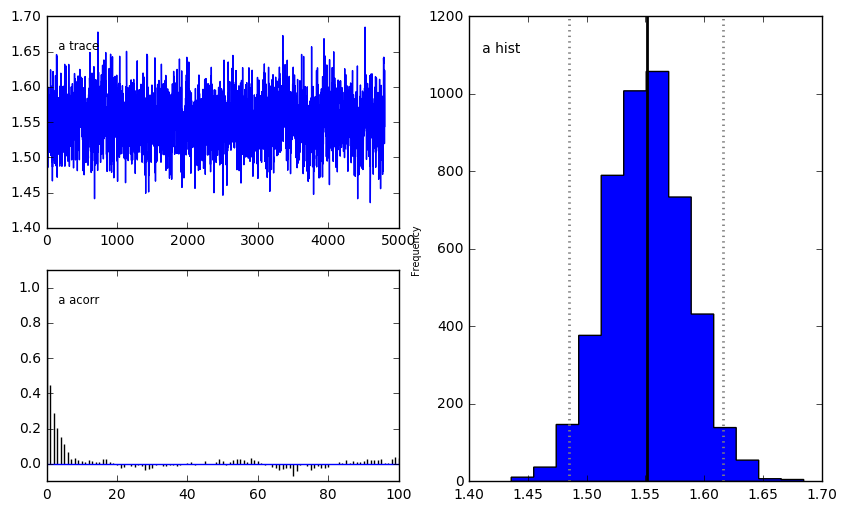

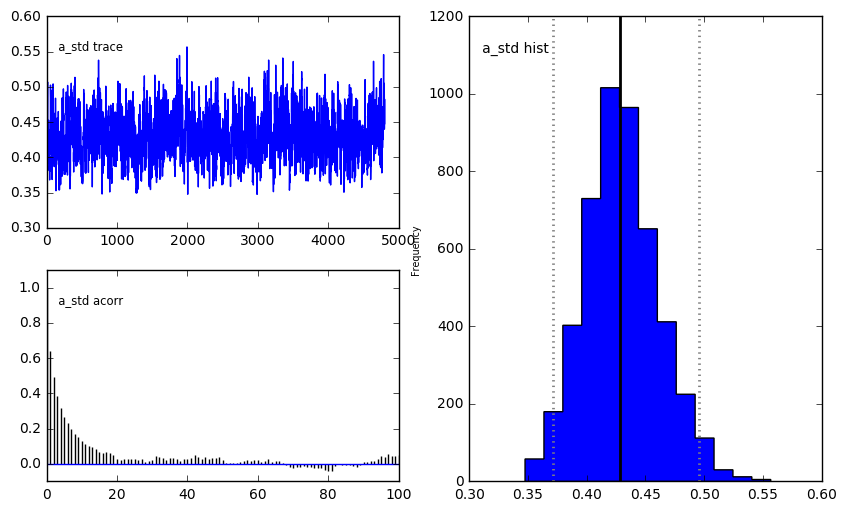

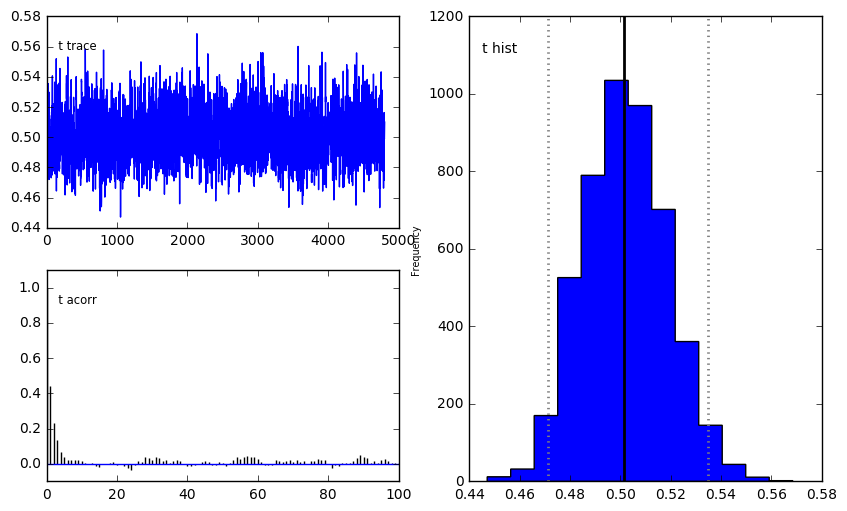

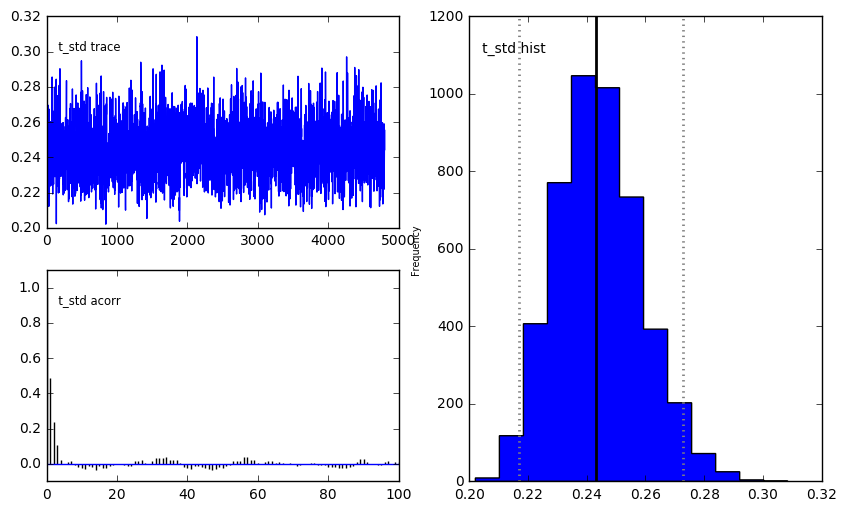

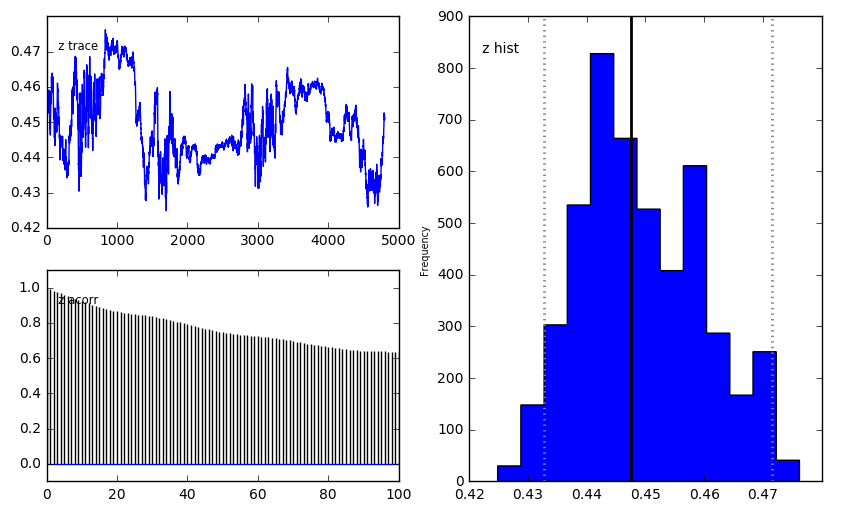

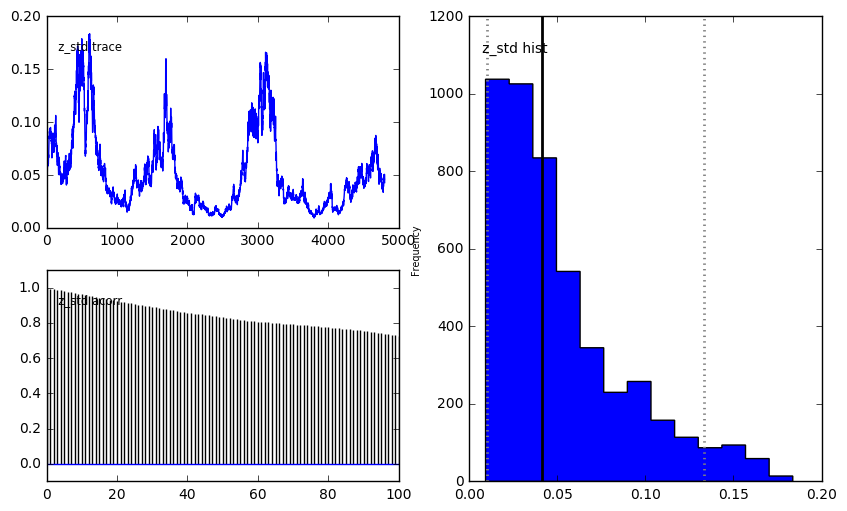

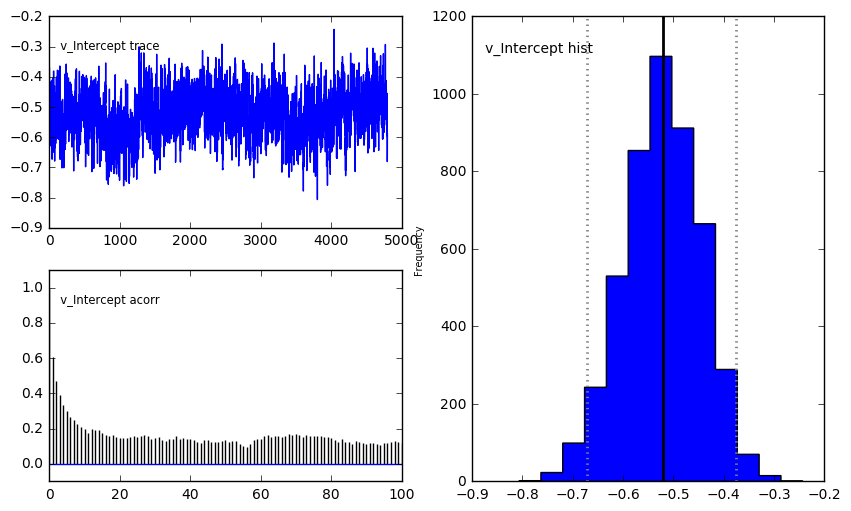

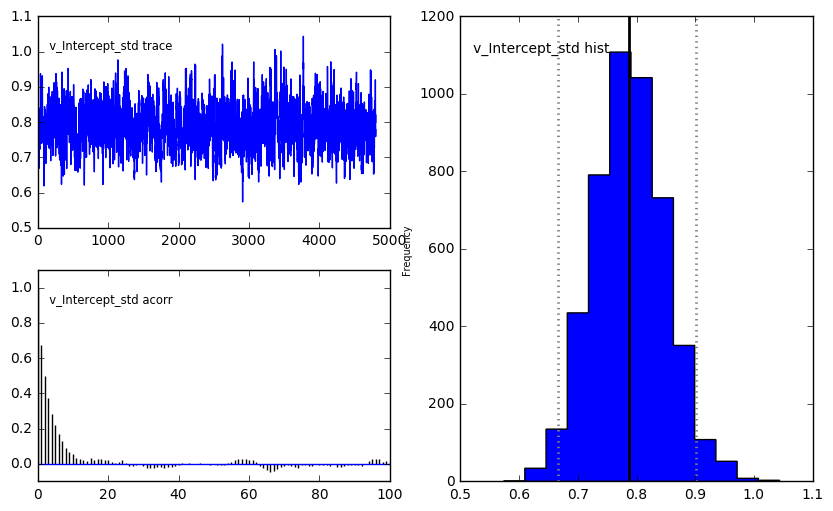

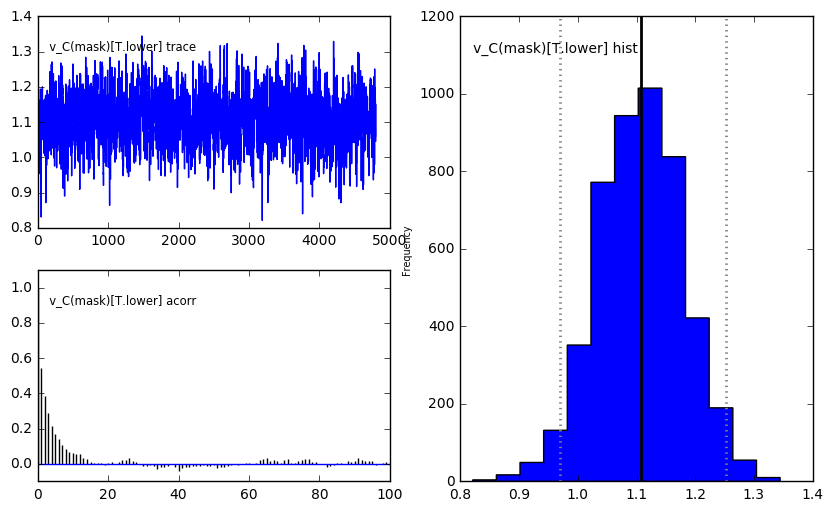

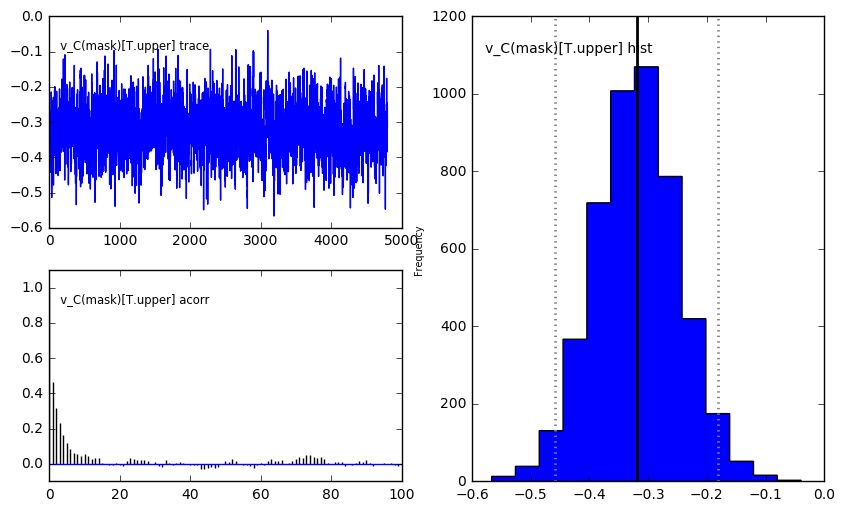

In [20]:
# save model stats
ad_stats = m_ad.gen_stats()
print(ad_stats)
ad_stats.to_csv('ad_5000/faceMask_hddm_faceRatings_maskFalsePositives_ad_5000.csv', index=True)

# save model posterior plots
m_ad.plot_posteriors(path='ad_5000/_posteriors', save=True)

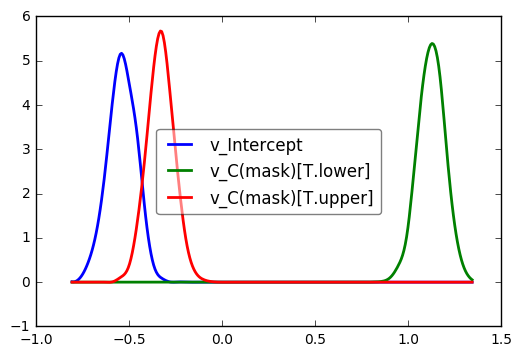

In [21]:
# plot model posteriors by mask
ad_v_none, ad_v_lower, ad_v_upper = m_ad.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ad_v_none, ad_v_lower, ad_v_upper])
plt.savefig('ad_5000/faceMask_hddm_faceRatings_maskFalsePositives_ad_5000_v_mask.pdf')

In [22]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ad_v_none < 0) = ", (ad_v_none.trace() < 0).mean())
print("P(ad_v_lower < 0) = ", (ad_v_lower.trace() < 0).mean())
print("P(ad_v_upper > 0) = ", (ad_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ad_v_lower < ad_v_upper) = ", (ad_v_lower.trace() < ad_v_upper.trace()).mean())

P(ad_v_none < 0) =  1.0
P(ad_v_lower < 0) =  0.0
P(ad_v_upper > 0) =  0.0
P(ad_v_lower < ad_v_upper) =  0.0


In [7]:
# subset dataset by emotion rating type (angry) and facial expression (happy)
ah_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'happy')]
ah_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
292,lbmmswtrr0mpvov,5,2,angry,293,_faces/BM17_H_X.jpg,BM17_H_X,BM17,B,M,happy,baseline,0,-0.750705,0,0,0,100,0,0
293,lbmmswtrr0mpvov,5,2,angry,294,_faces/WF02_H_U.jpg,WF02_H_U,WF02,W,F,happy,upper,0,-0.811045,0,0,0,50,0,0
299,lbmmswtrr0mpvov,5,2,angry,300,_faces/BM17_H_U.jpg,BM17_H_U,BM17,B,M,happy,upper,0,-0.739960,0,0,0,50,0,0
303,lbmmswtrr0mpvov,5,2,angry,304,_faces/AM04_H_X.jpg,AM04_H_X,AM04,A,M,happy,baseline,0,-0.875260,0,0,0,100,0,0
304,lbmmswtrr0mpvov,5,2,angry,305,_faces/AM04_H_U.jpg,AM04_H_U,AM04,A,M,happy,upper,0,-0.700670,0,0,0,50,0,0
305,lbmmswtrr0mpvov,5,2,angry,306,_faces/WF02_H_L.jpg,WF02_H_L,WF02,W,F,happy,lower,0,-1.150905,0,0,0,50,0,0
307,lbmmswtrr0mpvov,5,2,angry,308,_faces/WF02_H_X.jpg,WF02_H_X,WF02,W,F,happy,baseline,0,-0.781595,0,0,0,100,0,0
310,lbmmswtrr0mpvov,5,2,angry,311,_faces/AM04_H_L.jpg,AM04_H_L,AM04,A,M,happy,lower,0,-0.771255,0,0,0,50,0,0
315,lbmmswtrr0mpvov,5,2,angry,316,_faces/BM17_H_L.jpg,BM17_H_L,BM17,B,M,happy,lower,0,-0.698910,0,0,0,50,0,0
438,mr81dhy9r5lxu8r,2,5,angry,116,_faces/HF09_H_X.jpg,HF09_H_X,HF09,H,F,happy,baseline,0,-1.186000,0,0,0,100,0,0


In [8]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ah_data = ah_data[(ah_data.subj_idx != 'dqph4ch0mkofejw') & (ah_data.subj_idx != 'xs5439nm2v85thb')]

In [ ]:
# define model
m_ah = hddm.HDDMRegressor(ah_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 57267.9 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std        2.5q        25q        50q        75q       97.5q       mc err
a                                   2.02445   0.0778362     1.87705    1.97248    2.02137     2.0738     2.18078   0.00497397
a_std                              0.627995   0.0651526    0.506708   0.581238   0.626263   0.672944       0.757   0.00417606
a_subj.09coqg8hlpux6fe              2.13767    0.554917      1.2806     1.7329    2.06217    2.46261     3.40183    0.0203383
a_subj.0b3t2skj9mlhbkn              2.23672    0.556528     1.31829    1.83703    2.17313    2.57157     3.49714    0.0203291
a_subj.0bcg7mtj2n1jjw9              2.62797    0.658085     1.63098    2.16184    2.52331    2.97934     4.17812     0.021059
a_subj.0s53r30oouek89b              2.77599    0.691783     1.72548    2.27328    2.67932    3.18746      4.3654    0.0247586
a_subj.0uj9gbhag3o1w1v              2.06606    0.572406     1.22502    1.64873    1.96768    2.39787     3.43317    0.

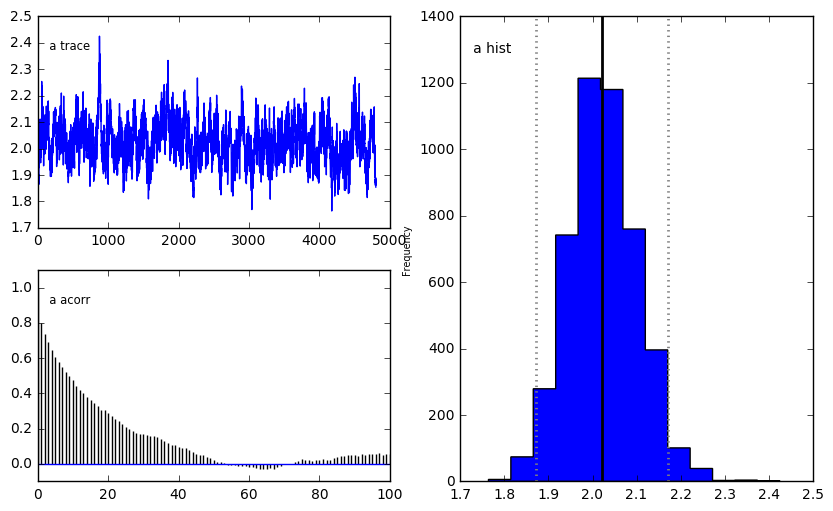

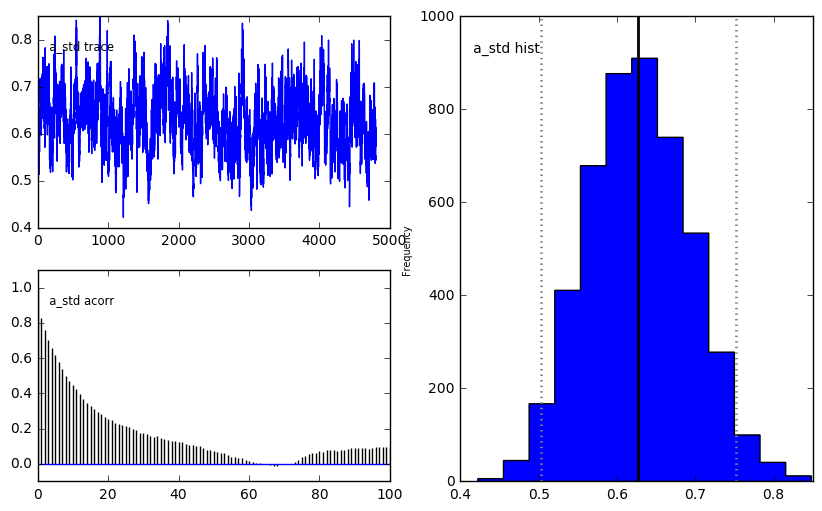

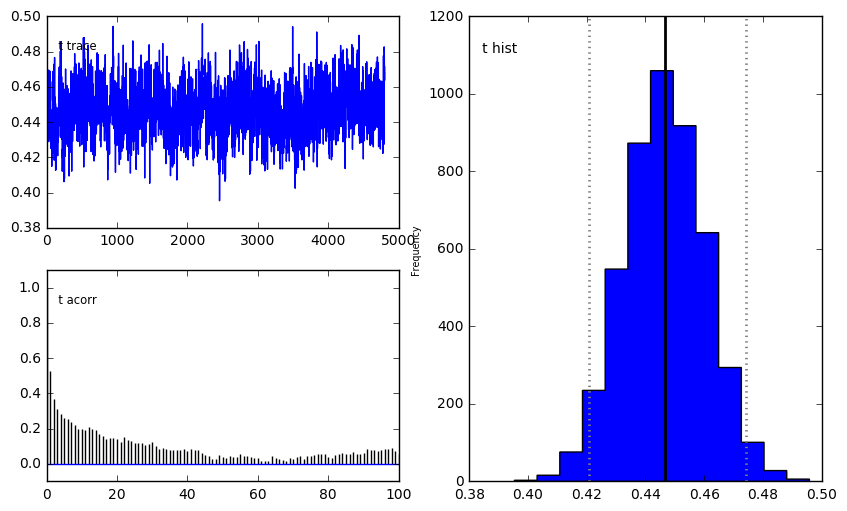

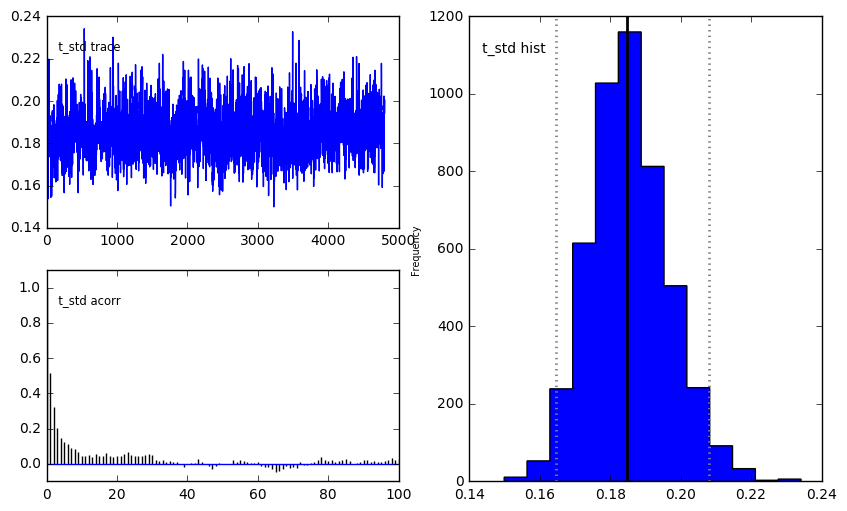

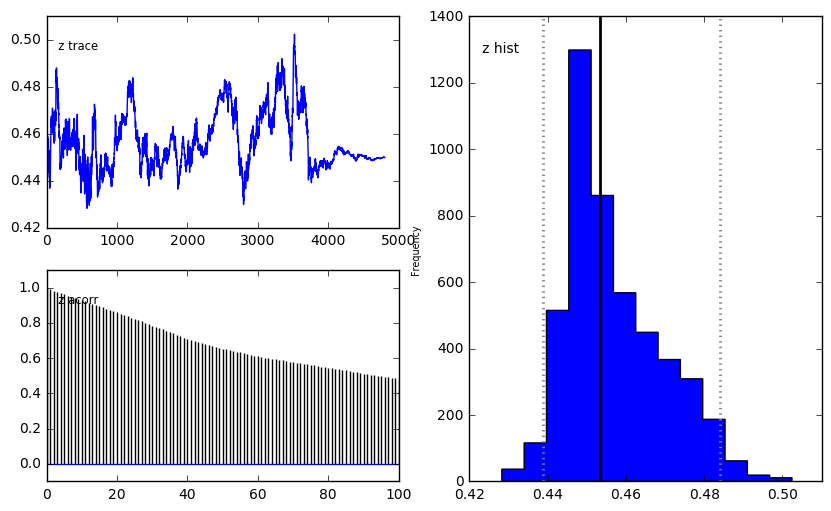

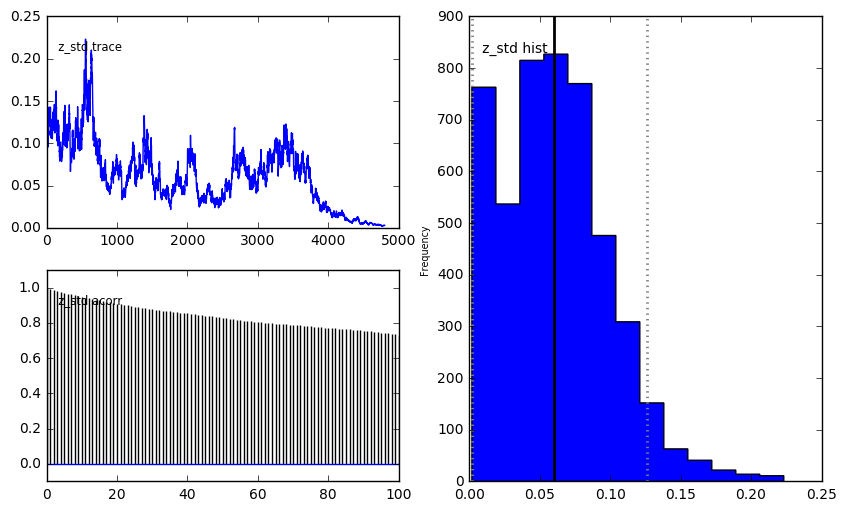

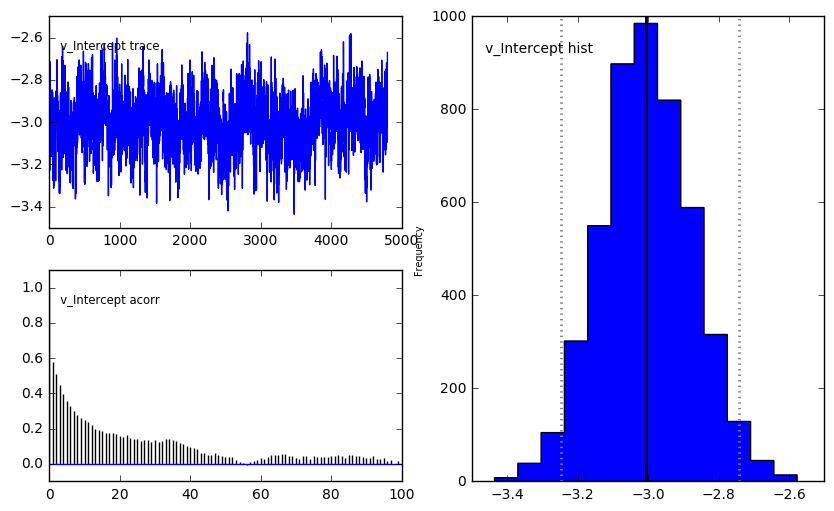

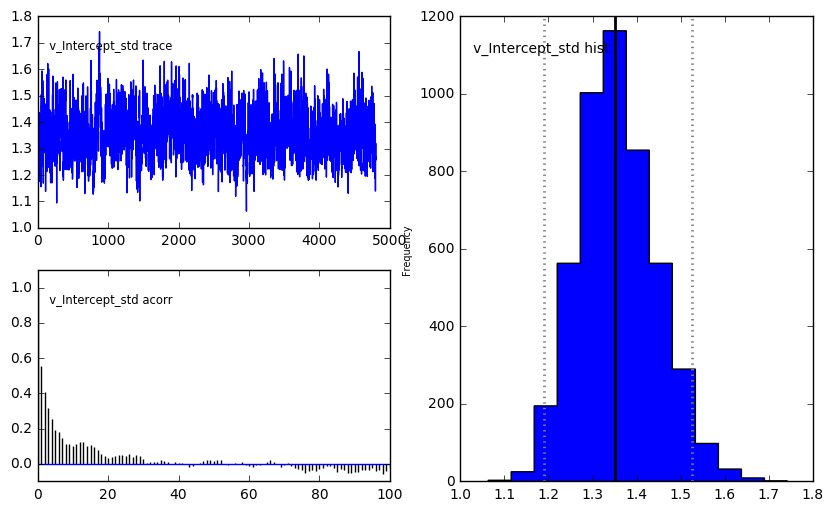

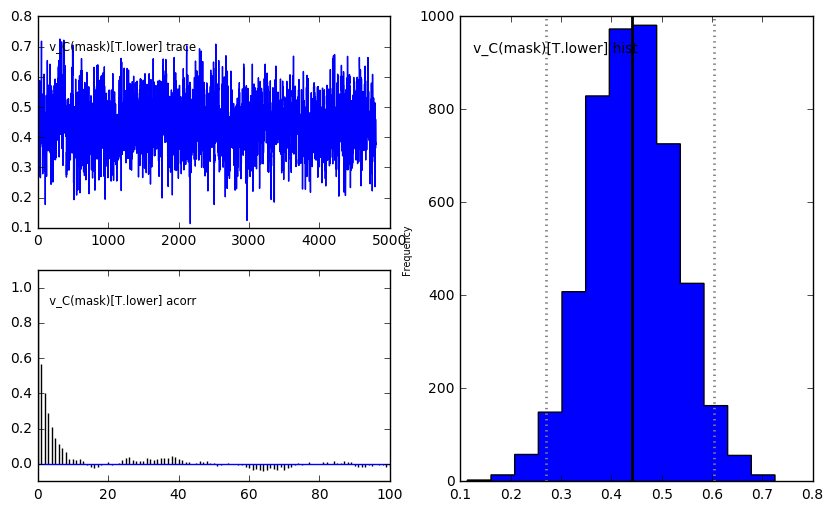

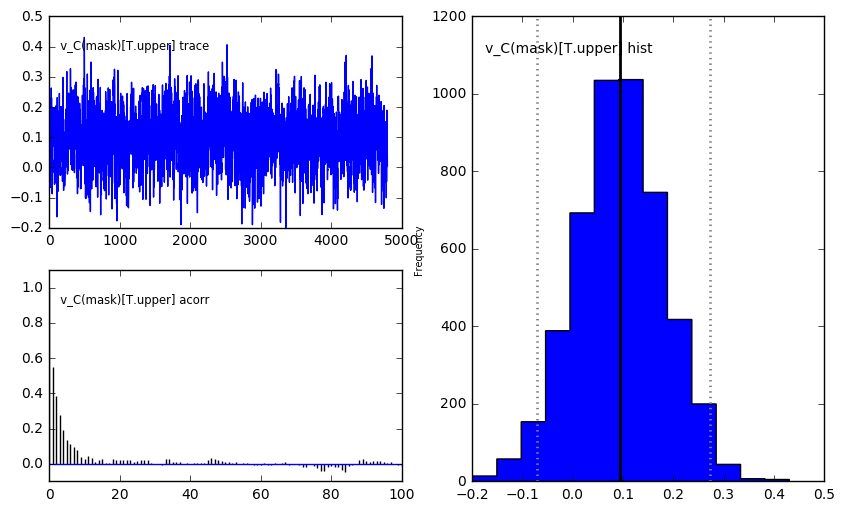

In [ ]:
# run model
m_ah.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ah.print_stats()
m_ah.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   2.02445  0.0778362    1.87705    1.97248   
a_std                              0.627995  0.0651526   0.506708   0.581238   
a_subj.09coqg8hlpux6fe              2.13767   0.554917     1.2806     1.7329   
a_subj.0b3t2skj9mlhbkn              2.23672   0.556528    1.31829    1.83703   
a_subj.0bcg7mtj2n1jjw9              2.62797   0.658085    1.63098    2.16184   
a_subj.0s53r30oouek89b              2.77599   0.691783    1.72548    2.27328   
a_subj.0uj9gbhag3o1w1v              2.06606   0.572406    1.22502    1.64873   
a_subj.17nzn4k8r1qkmrn              1.93037   0.524881    1.08696    1.54662   
a_subj.1fdkw2qjx3hc3lk              2.16584   0.545142    1.27778    1.78191   
a_subj.1mla0dmotqefnav              2.34702   0.553994    1.43088    1.95134   
a_subj.23hr9tl84h3zhw3              2.24231   0.348943    1.65794    1.99369   
a_subj.27muqwvalwne26r              2.06

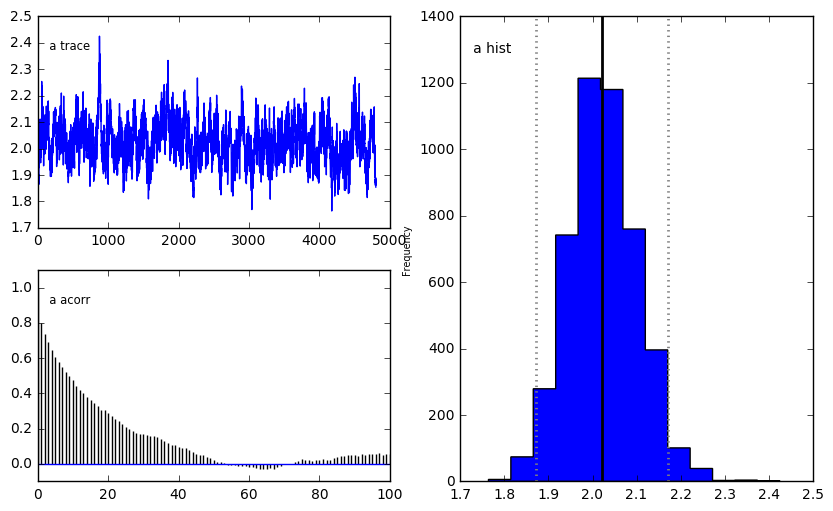

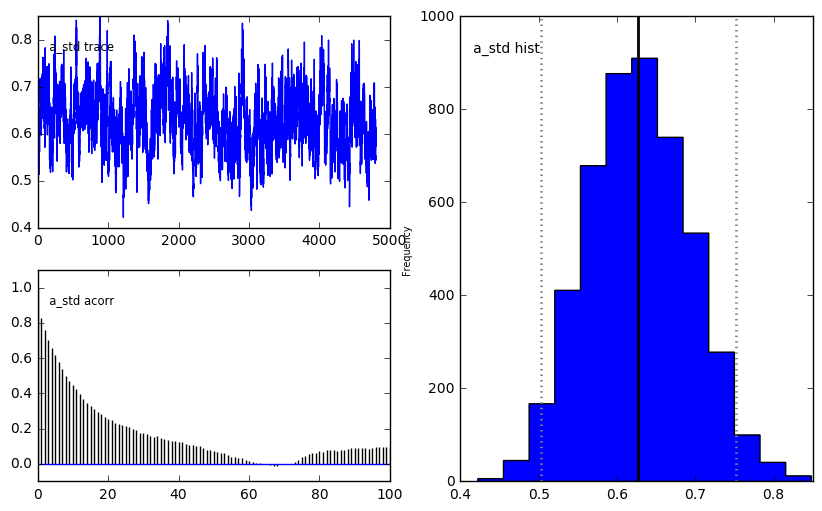

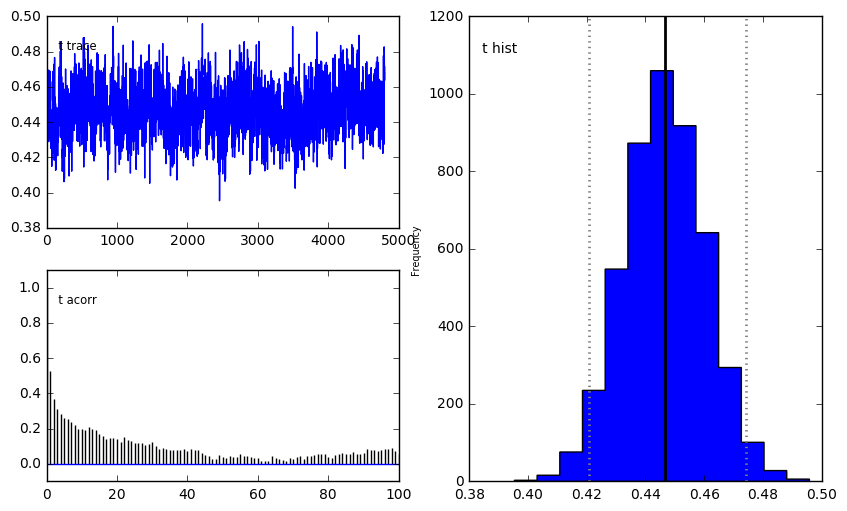

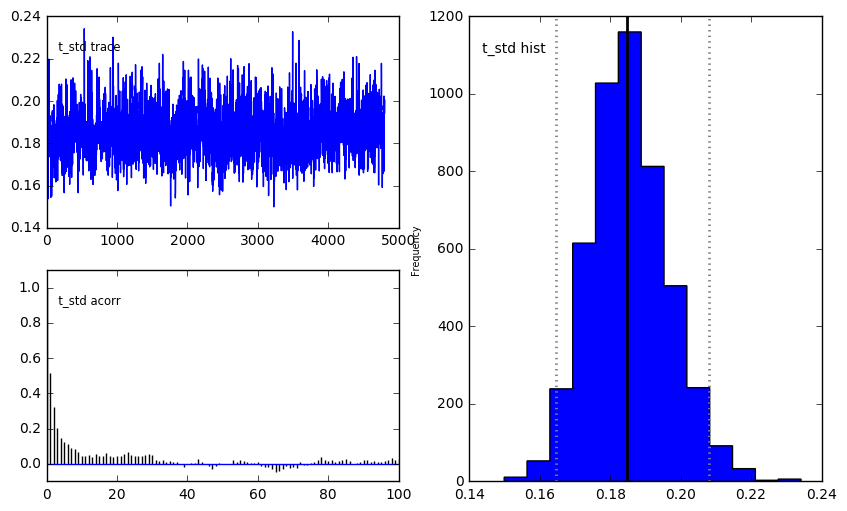

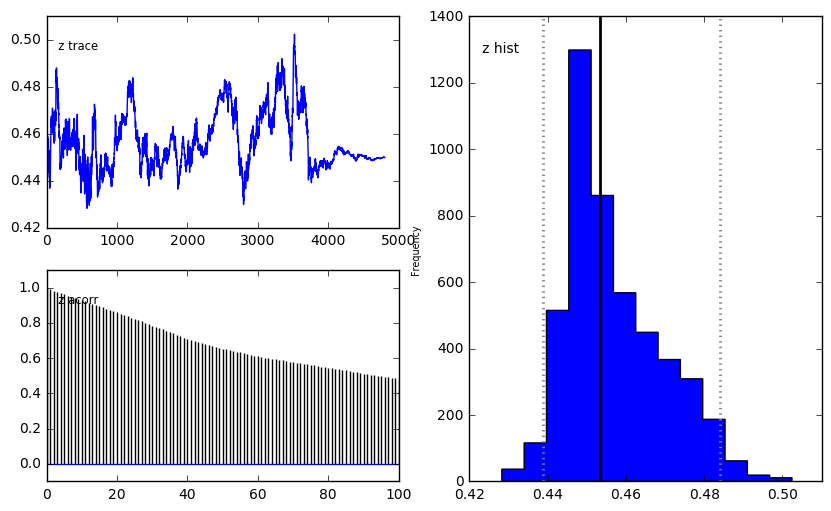

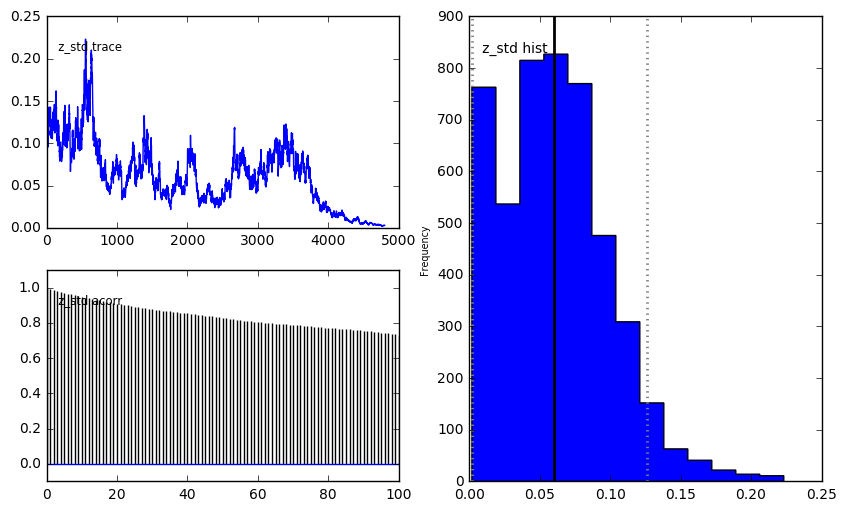

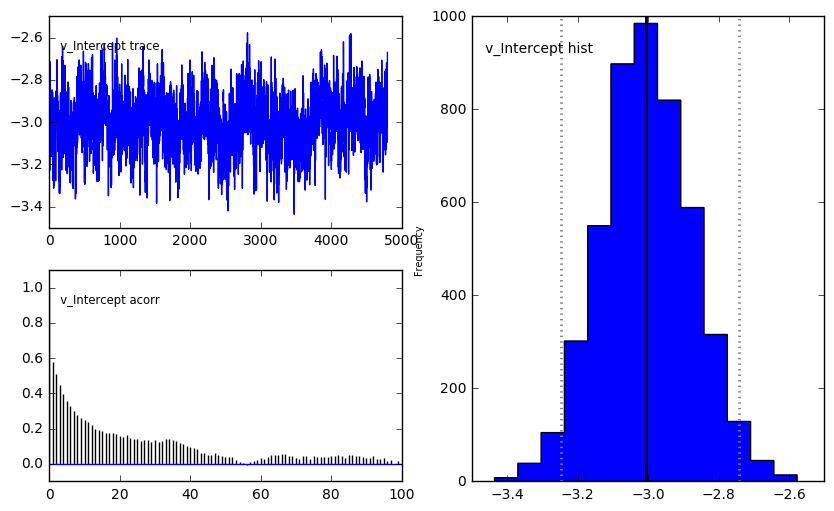

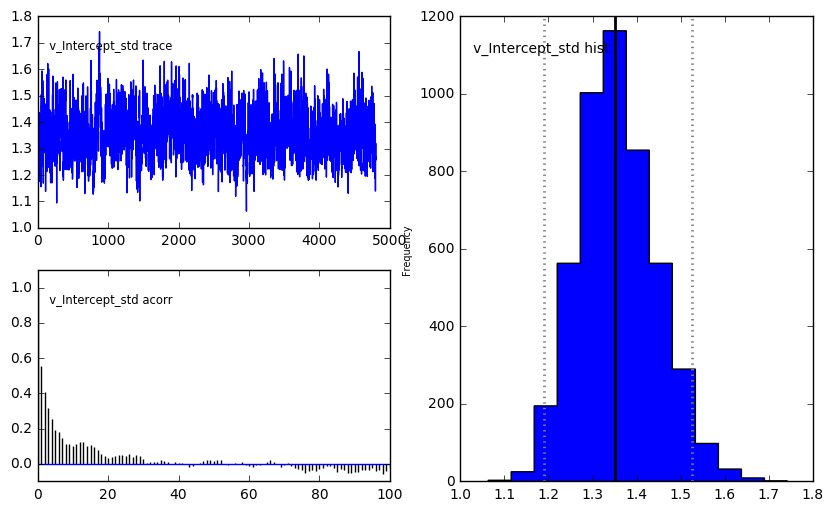

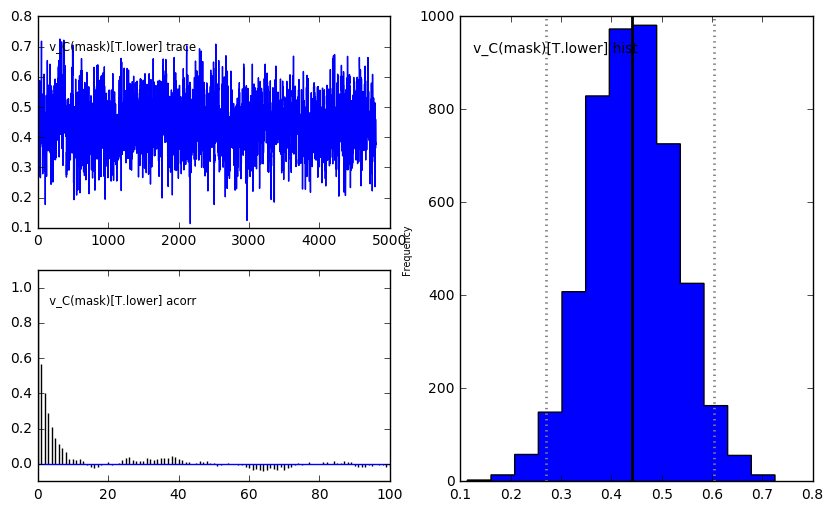

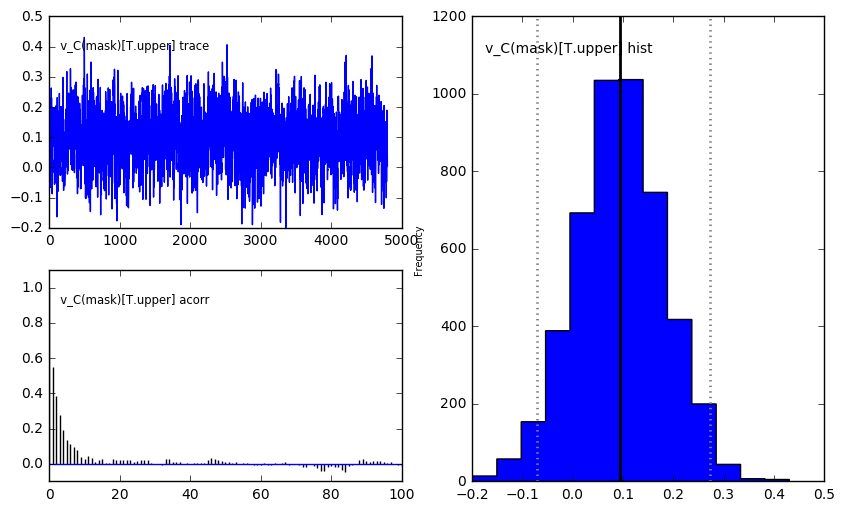

In [11]:
# save model stats
ah_stats = m_ah.gen_stats()
print(ah_stats)
ah_stats.to_csv('ah_5000/faceMask_hddm_faceRatings_maskFalsePositives_ah_5000.csv', index=True)

# save model posterior plots
m_ah.plot_posteriors(path='ah_5000/_posteriors', save=True)

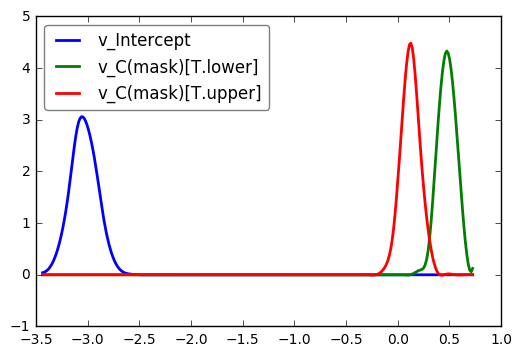

In [12]:
# plot model posteriors by mask
ah_v_none, ah_v_lower, ah_v_upper = m_ah.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ah_v_none, ah_v_lower, ah_v_upper])
plt.savefig('ah_5000/faceMask_hddm_faceRatings_maskFalsePositives_ah_5000_v_mask.pdf')

In [13]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ah_v_none > 0) = ", (ah_v_none.trace() > 0).mean())
print("P(ah_v_lower < 0) = ", (ah_v_lower.trace() < 0).mean())
print("P(ah_v_upper > 0) = ", (ah_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ah_v_lower < ah_v_upper) = ", (ah_v_lower.trace() < ah_v_upper.trace()).mean())

P(ah_v_none > 0) =  0.0
P(ah_v_lower < 0) =  0.0
P(ah_v_upper > 0) =  0.859166666667
P(ah_v_lower < ah_v_upper) =  0.0


In [23]:
# subset dataset by emotion rating type (angry) and facial expression (surprised)
ar_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'surprised')]
ar_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
272,lbmmswtrr0mpvov,5,2,angry,273,_faces/WF05_R_X.jpg,WF05_R_X,WF05,W,F,surprised,baseline,0,-0.980745,0,0,0,0,0,100
274,lbmmswtrr0mpvov,5,2,angry,275,_faces/AM07_R_U.jpg,AM07_R_U,AM07,A,M,surprised,upper,0,-0.781640,0,0,0,0,0,50
275,lbmmswtrr0mpvov,5,2,angry,276,_faces/AM07_R_X.jpg,AM07_R_X,AM07,A,M,surprised,baseline,0,-0.684105,0,0,0,0,0,100
280,lbmmswtrr0mpvov,5,2,angry,281,_faces/HF04_R_L.jpg,HF04_R_L,HF04,H,F,surprised,lower,0,-1.260035,0,0,0,0,0,50
297,lbmmswtrr0mpvov,5,2,angry,298,_faces/HF04_R_U.jpg,HF04_R_U,HF04,H,F,surprised,upper,0,-1.581520,0,0,0,0,0,50
309,lbmmswtrr0mpvov,5,2,angry,310,_faces/WF05_R_U.jpg,WF05_R_U,WF05,W,F,surprised,upper,0,-0.828735,0,0,0,0,0,50
314,lbmmswtrr0mpvov,5,2,angry,315,_faces/HF04_R_X.jpg,HF04_R_X,HF04,H,F,surprised,baseline,0,-0.557835,0,0,0,0,0,100
316,lbmmswtrr0mpvov,5,2,angry,317,_faces/AM07_R_L.jpg,AM07_R_L,AM07,A,M,surprised,lower,0,-0.893000,0,0,0,0,0,50
319,lbmmswtrr0mpvov,5,2,angry,320,_faces/WF05_R_L.jpg,WF05_R_L,WF05,W,F,surprised,lower,1,1.332695,0,0,0,0,0,50
437,mr81dhy9r5lxu8r,2,5,angry,115,_faces/BF15_R_U.jpg,BF15_R_U,BF15,B,F,surprised,upper,0,-2.034000,0,0,0,0,0,50


In [24]:
# drop any subjects missing columns in design matrix (otherwise produces error) 
ar_data = ar_data[(ar_data.subj_idx != 'dqph4ch0mkofejw')]

In [ ]:
# define model
m_ar = hddm.HDDMRegressor(ar_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 90300.9 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std       2.5q         25q        50q        75q       97.5q       mc err
a                                   2.08089   0.0775087      1.933     2.02793    2.08029    2.13209     2.24278   0.00436681
a_std                              0.710369   0.0635724    0.59438    0.666123   0.706476    0.75068    0.846339   0.00331818
a_subj.09coqg8hlpux6fe              2.22514    0.608482    1.25991     1.79223    2.14568    2.58177     3.63146    0.0244314
a_subj.0b3t2skj9mlhbkn              2.29842    0.584471    1.37645     1.87001    2.22836    2.65939     3.61163     0.018433
a_subj.0bcg7mtj2n1jjw9              2.94964     0.57694    1.99729     2.53668    2.88368    3.29018     4.25762    0.0143879
a_subj.0s53r30oouek89b              3.46875    0.767465    2.25823     2.90057    3.38314    3.93248     5.22449    0.0244794
a_subj.0uj9gbhag3o1w1v              2.51236    0.730942    1.41818     1.96506     2.4098    2.94584     4.17441    0.

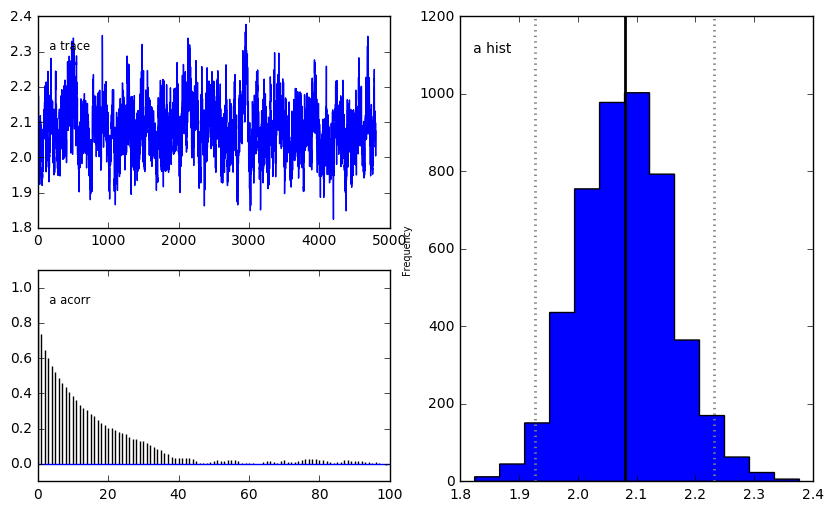

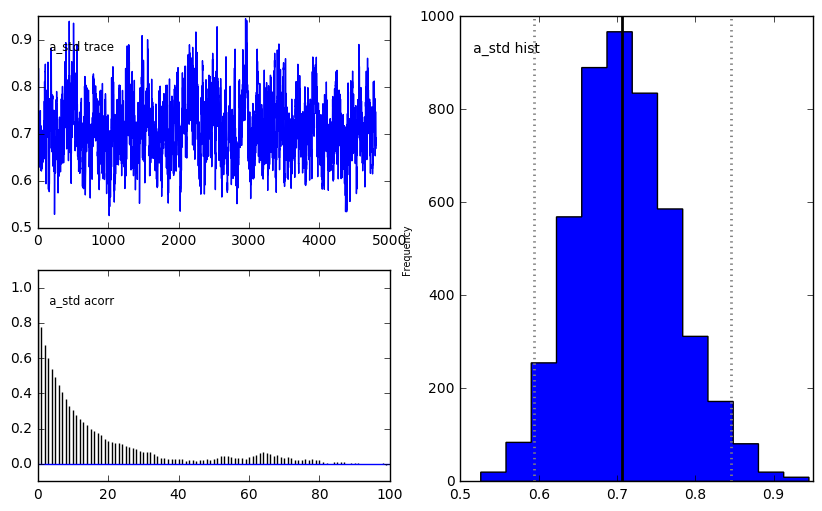

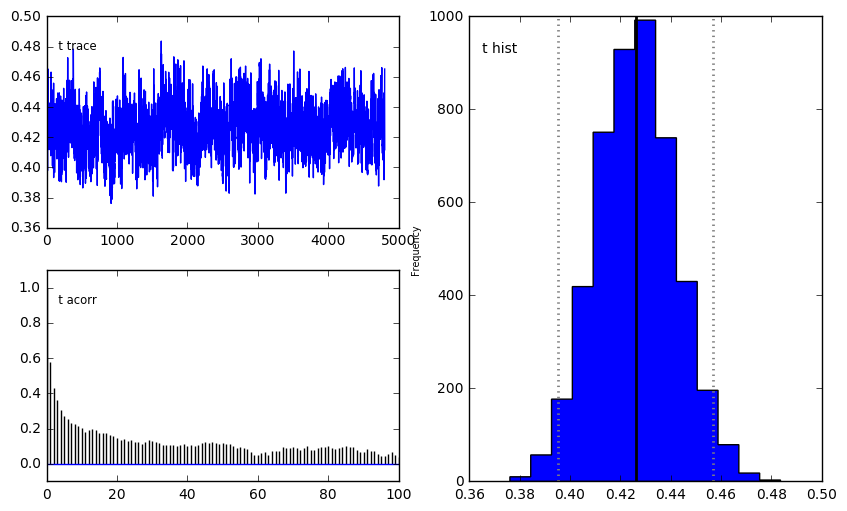

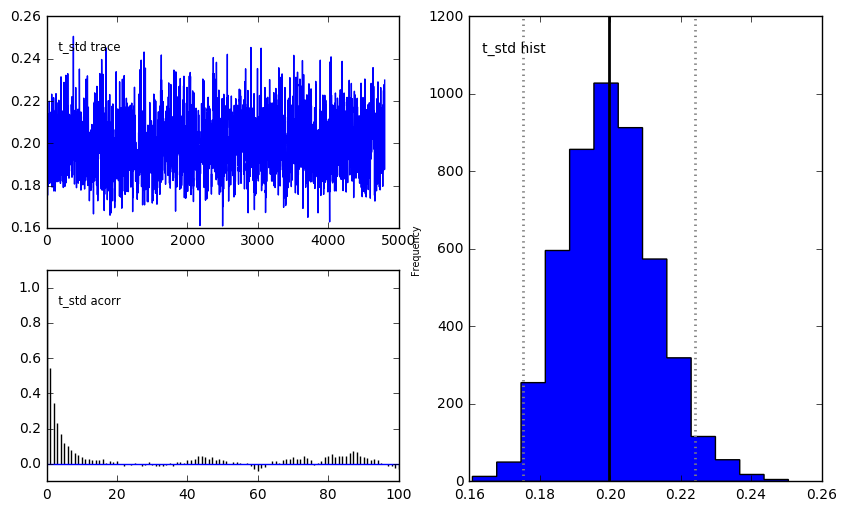

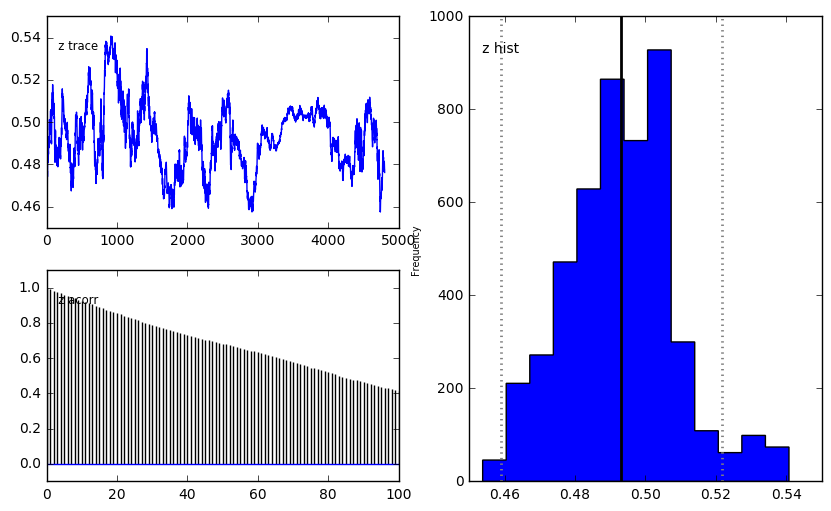

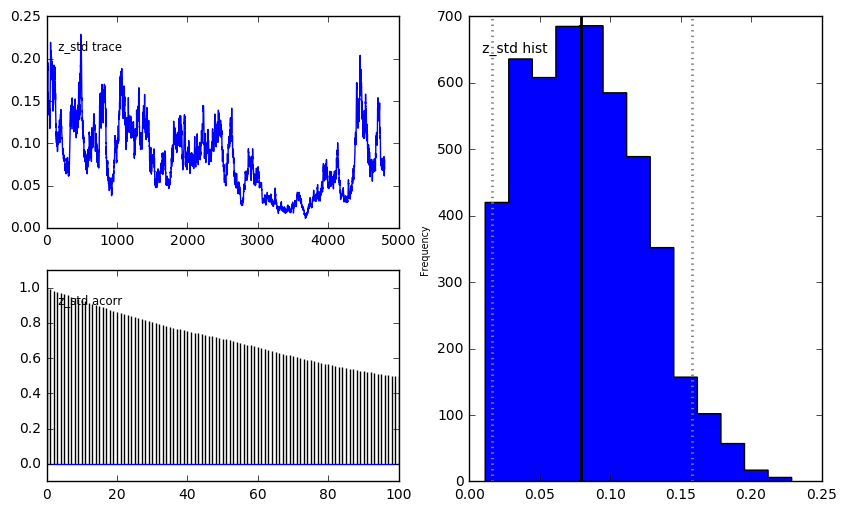

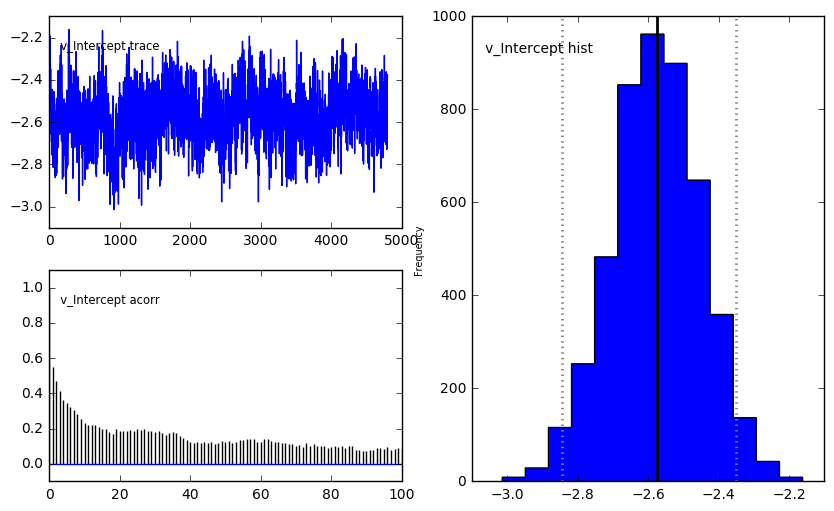

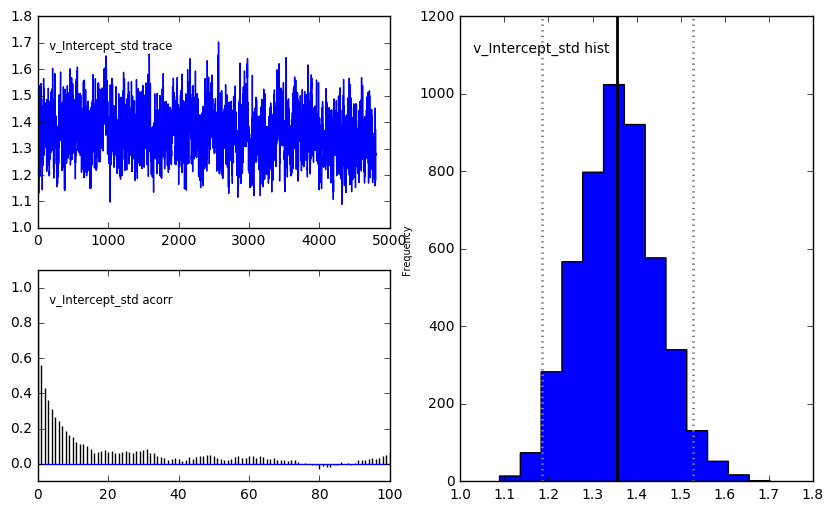

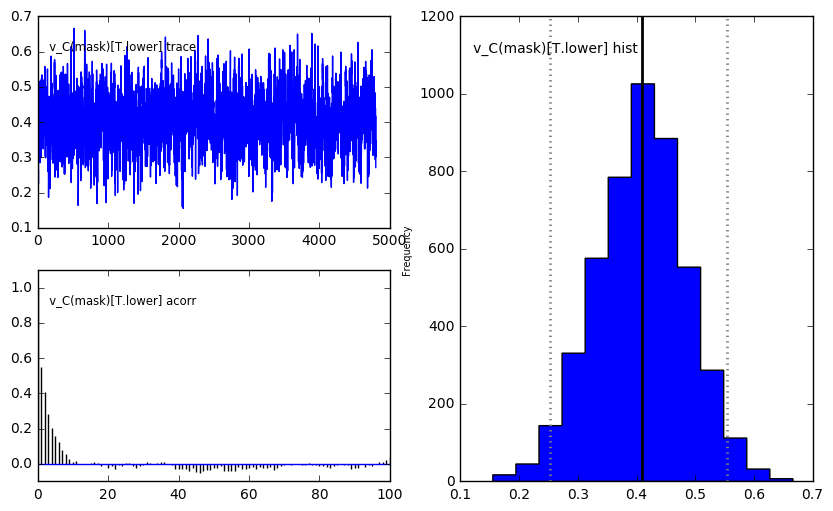

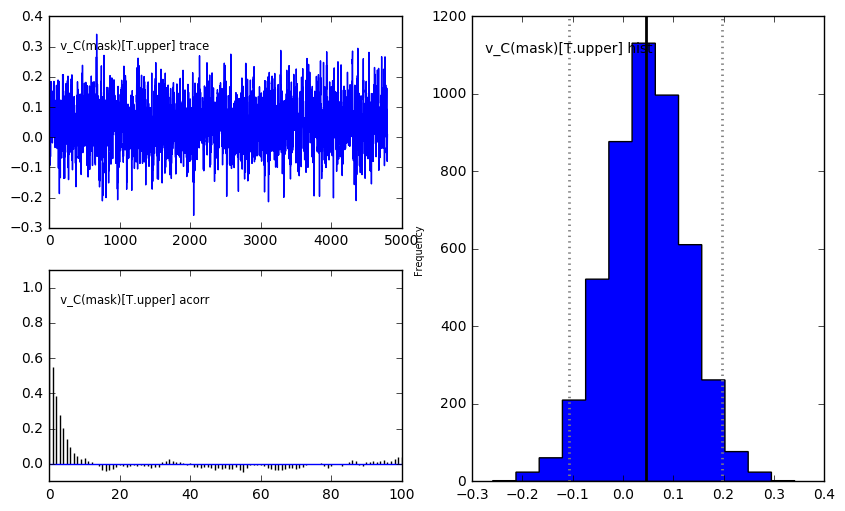

In [ ]:
# run model
m_ar.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ar.print_stats()
m_ar.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q         25q  \
a                                   2.08089  0.0775087     1.933     2.02793   
a_std                              0.710369  0.0635724   0.59438    0.666123   
a_subj.09coqg8hlpux6fe              2.22514   0.608482   1.25991     1.79223   
a_subj.0b3t2skj9mlhbkn              2.29842   0.584471   1.37645     1.87001   
a_subj.0bcg7mtj2n1jjw9              2.94964    0.57694   1.99729     2.53668   
a_subj.0s53r30oouek89b              3.46875   0.767465   2.25823     2.90057   
a_subj.0uj9gbhag3o1w1v              2.51236   0.730942   1.41818     1.96506   
a_subj.17nzn4k8r1qkmrn              2.40007   0.529656   1.55826     2.01351   
a_subj.1fdkw2qjx3hc3lk              2.22058    0.61001   1.28525     1.76502   
a_subj.1mla0dmotqefnav              2.93574   0.513703   2.09273     2.56127   
a_subj.23hr9tl84h3zhw3              2.26838   0.593711   1.32252     1.83778   
a_subj.27muqwvalwne26r               2.3

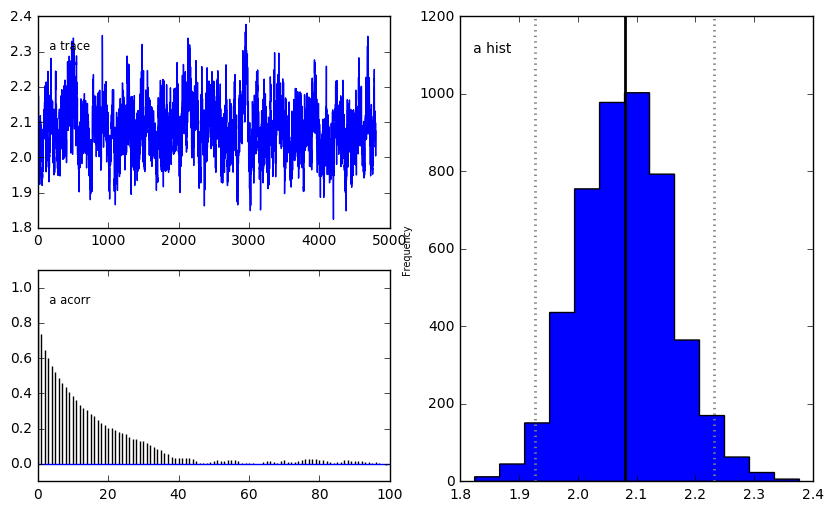

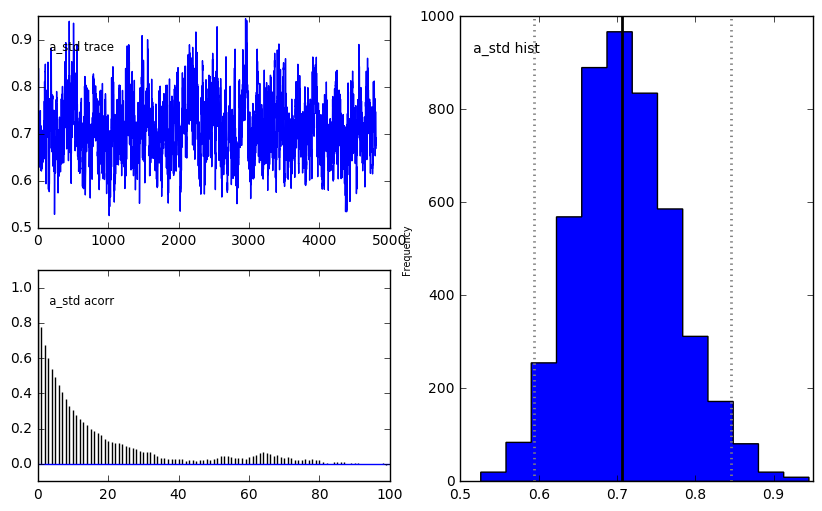

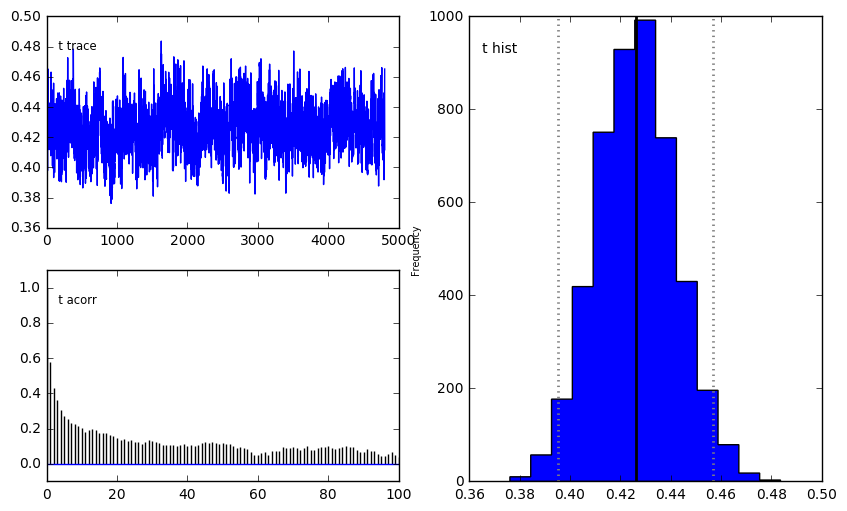

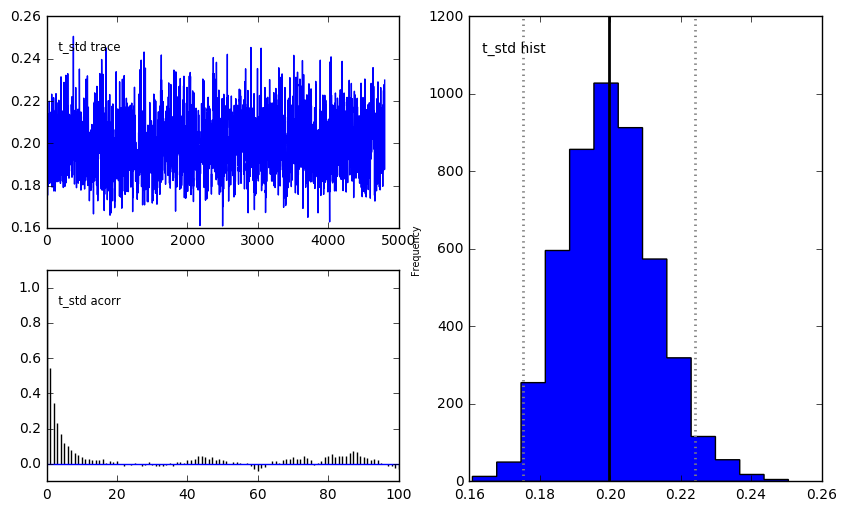

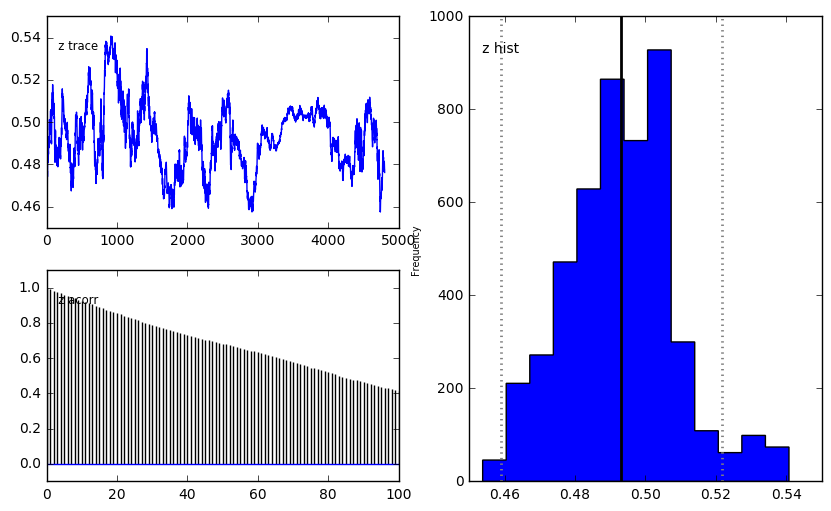

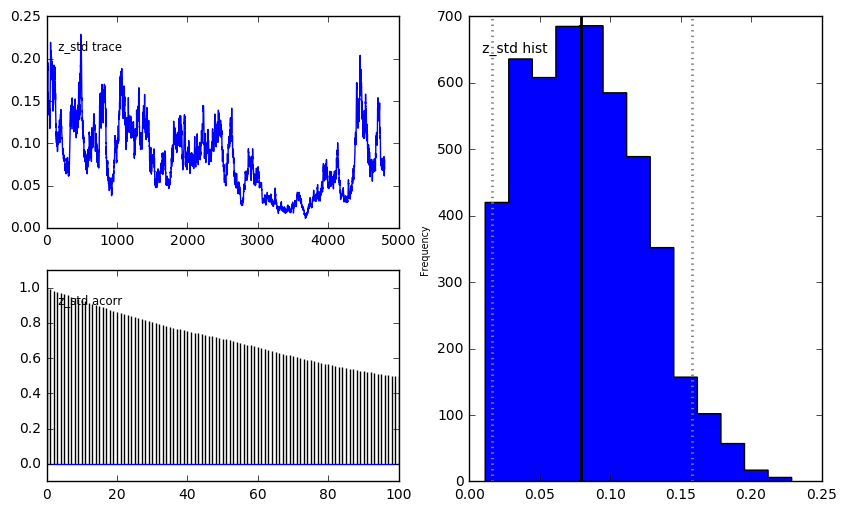

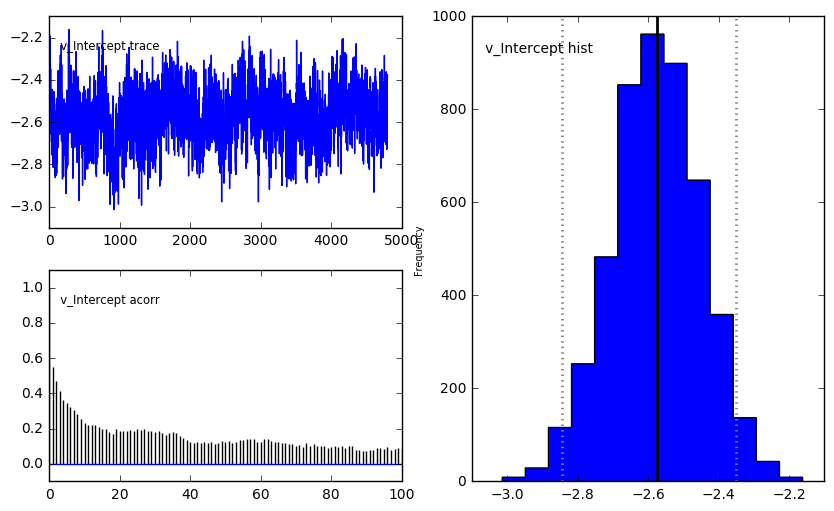

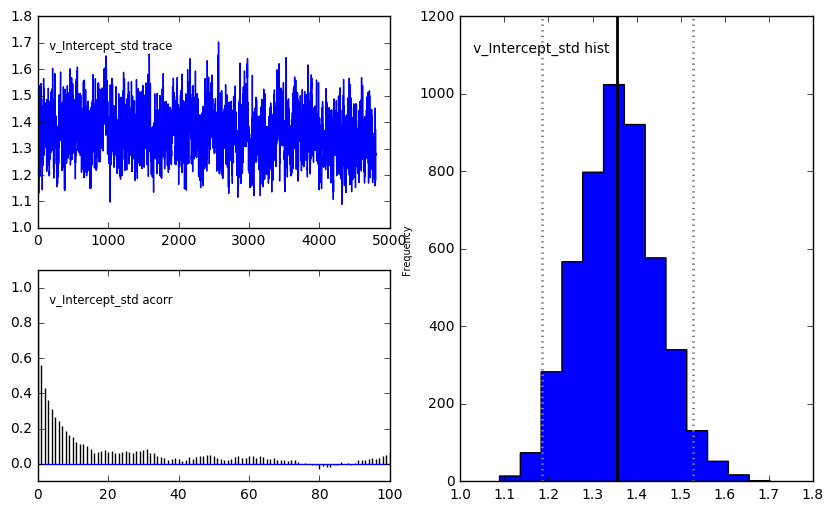

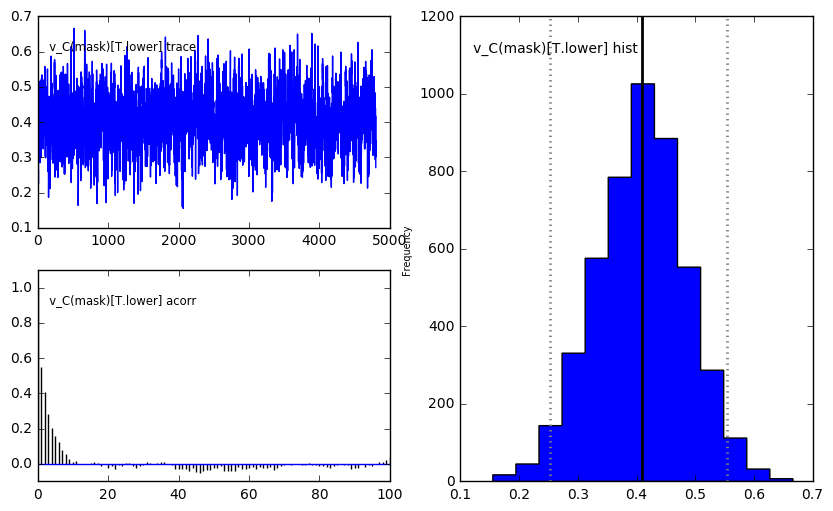

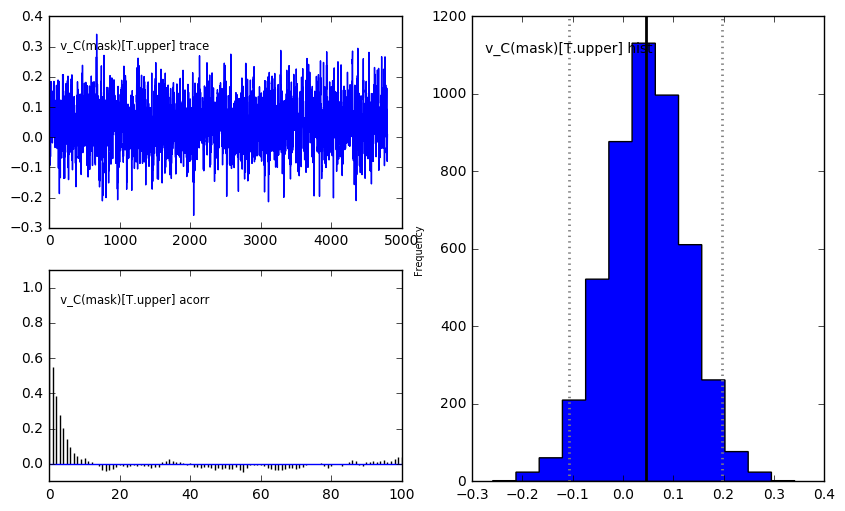

In [28]:
# save model stats
ar_stats = m_ar.gen_stats()
print(ar_stats)
ar_stats.to_csv('ar_5000/faceMask_hddm_faceRatings_maskFalsePositives_ar_5000.csv', index=True)

# save model posterior plots
m_ar.plot_posteriors(path='ar_5000/_posteriors', save=True)

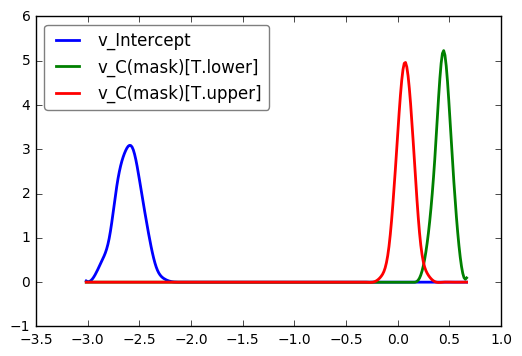

In [29]:
# plot model posteriors by mask
ar_v_none, ar_v_lower, ar_v_upper = m_ar.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ar_v_none, ar_v_lower, ar_v_upper])
plt.savefig('ar_5000/faceMask_hddm_faceRatings_maskFalsePositives_ar_5000_v_mask.pdf')

In [30]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ar_v_none < 0) = ", (ar_v_none.trace() < 0).mean())
print("P(ar_v_lower < 0) = ", (ar_v_lower.trace() < 0).mean())
print("P(ar_v_upper > 0) = ", (ar_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ar_v_lower < ar_v_upper) = ", (ar_v_lower.trace() < ar_v_upper.trace()).mean())

P(ar_v_none < 0) =  1.0
P(ar_v_lower < 0) =  0.0
P(ar_v_upper > 0) =  0.724166666667
P(ar_v_lower < ar_v_upper) =  0.0
